<h1 align="center">CUSTOMER SEGMENTATION MODEL</h1>

Dataset: <a href="https://www.kaggle.com/datasets/vetrirah/customer/data">Click here for dataset</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("customer.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [3]:
df1 = df.drop(['ID','Var_1'],axis=1)
df1.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,Female,Yes,69,No,NaN,0.0,Low,1.0
3,Male,Yes,59,No,Executive,11.0,High,2.0
4,Female,No,19,No,Marketing,NaN,Low,4.0


In [4]:
df1.shape

(2627, 8)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   object 
 1   Ever_Married     2577 non-null   object 
 2   Age              2627 non-null   int64  
 3   Graduated        2603 non-null   object 
 4   Profession       2589 non-null   object 
 5   Work_Experience  2358 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2514 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 164.3+ KB


In [6]:
df1.describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2358.000000,2514.000000
mean,43.649791,2.552587,2.825378
std,16.967015,3.341094,1.551906
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


### Treating Outliers

In [7]:
df1['Age'].skew()

0.7044482403497572

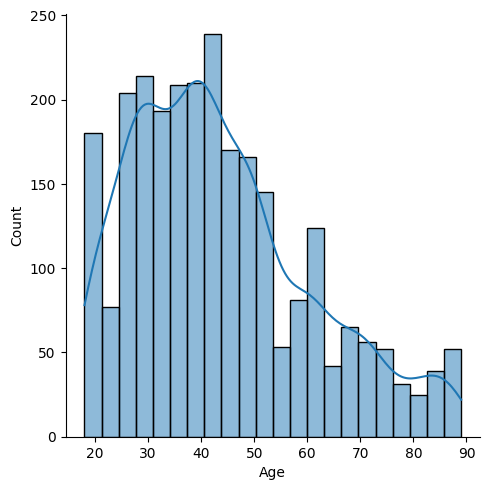

In [8]:
sns.displot(df1['Age'],kde=True)
plt.show()

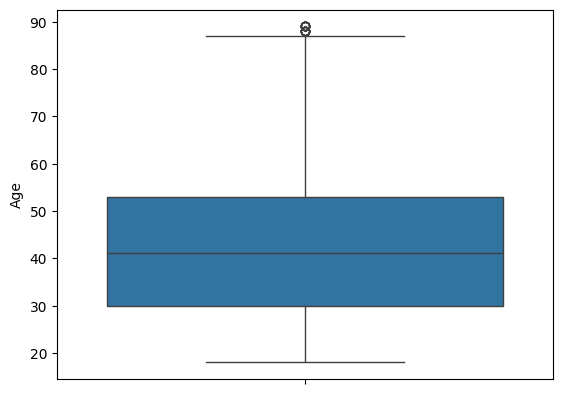

In [9]:
sns.boxplot(df1['Age'])
plt.show()

In [10]:
# Removing outliers from 'Age' columns

p25 = df1['Age'].quantile(0.25)
p75 = df1['Age'].quantile(0.75)

IQR = p75 - p25
print('IQR:',IQR)

upper_whisker = p75+(1.5*IQR)
lower_whisker = p25-(1.5*IQR)
print('Upper Whisker:',upper_whisker)
print('Lower Whisker:',lower_whisker)


df2 = df1[(df1['Age']<upper_whisker) & (df1['Age']>lower_whisker)]

IQR: 23.0
Upper Whisker: 87.5
Lower Whisker: -4.5


In [11]:
df2.shape

(2608, 8)

In [12]:
# Null values in ecah column

df2.isnull().sum()

Gender               0
Ever_Married        49
Age                  0
Graduated           24
Profession          38
Work_Experience    267
Spending_Score       0
Family_Size        111
dtype: int64

In [13]:
# Percentage of null values in each column

df2.isnull().mean()*100

Gender              0.000000
Ever_Married        1.878834
Age                 0.000000
Graduated           0.920245
Profession          1.457055
Work_Experience    10.237730
Spending_Score      0.000000
Family_Size         4.256135
dtype: float64

In [14]:
# Unique values in each null column 

null_cols = df2[['Ever_Married','Graduated','Profession','Work_Experience','Family_Size']]

for i in null_cols.columns:
    print('Unique values in',i, 'are :')
    print(null_cols[i].value_counts())
    print('-'*50)

Unique values in Ever_Married are :
Ever_Married
Yes    1503
No     1056
Name: count, dtype: int64
--------------------------------------------------
Unique values in Graduated are :
Graduated
Yes    1589
No      995
Name: count, dtype: int64
--------------------------------------------------
Unique values in Profession are :
Profession
Artist           799
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           205
Executive        176
Marketing        111
Homemaker         82
Name: count, dtype: int64
--------------------------------------------------
Unique values in Work_Experience are :
Work_Experience
0.0     765
1.0     765
8.0     149
9.0     139
4.0      91
2.0      86
3.0      81
5.0      76
6.0      61
7.0      59
14.0     21
11.0     14
12.0     12
13.0     11
10.0     11
Name: count, dtype: int64
--------------------------------------------------
Unique values in Family_Size are :
Family_Size
2.0    758
1.0    507
3.0    454
4.0

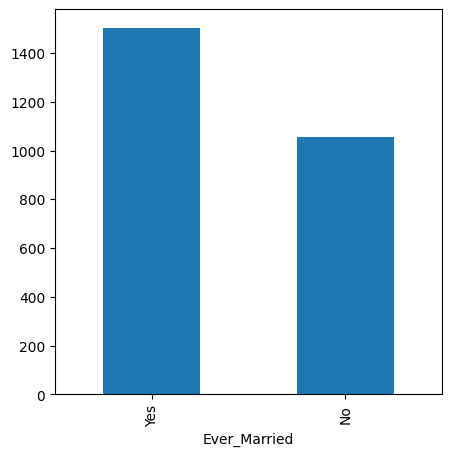

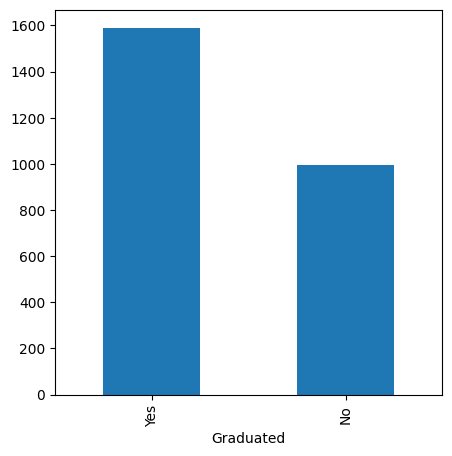

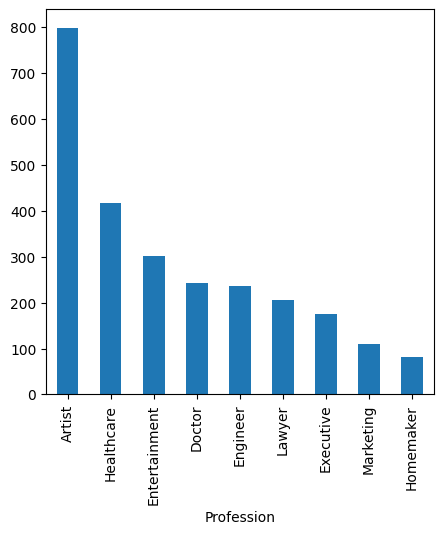

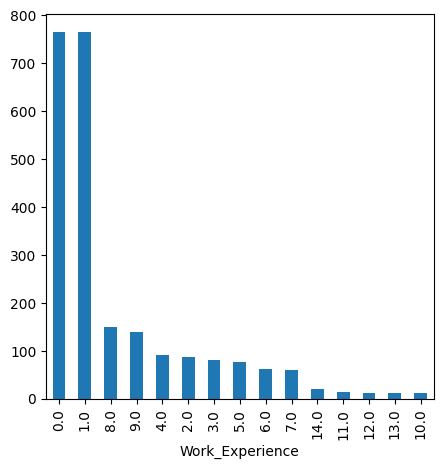

In [15]:
cat_cols = df2[['Ever_Married','Graduated','Profession','Work_Experience']]
    
for col in cat_cols.columns:
    plt.figure(figsize=(5,5))
    cat_cols[col].value_counts().sort_values(ascending=False).plot.bar()
    plt.show()

### DATA MODELING

In [16]:
X = df2.copy()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import Pipeline

impute_ohe_pipe = Pipeline(steps=[('imputation',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype=np.int32))])

impute_ode_pipe = Pipeline(steps=[('imputation',SimpleImputer(strategy='most_frequent')),
                           ('ode',OrdinalEncoder(categories=[["Yes","No"]],dtype=np.int32))])

In [19]:
col_transform = ColumnTransformer(transformers=[
    ('impute_ohe',impute_ohe_pipe,['Ever_Married','Profession']),
    ('impute_ode',impute_ode_pipe,['Graduated']),
    ('median_impute',SimpleImputer(strategy='median'),['Work_Experience']),
    ('mode_impute',SimpleImputer(strategy='most_frequent'),['Family_Size']),
    ('ode',OrdinalEncoder(categories=[["Low","Average","High"]],dtype=np.int32),['Spending_Score']),
    ('ohe',OneHotEncoder(sparse_output=False,drop='first',dtype=np.int32),['Gender']),
    ('scaling',StandardScaler(),['Age'])],
    remainder='passthrough')

In [20]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [21]:
col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_ohe',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                dtype=<class 'numpy.int32'>,
                                                                sparse_output=False))]),
                                 ['Ever_Married', 'Profession']),
                                ('impute_ode',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ode',
                                                  O...
                                 SimpleImputer(strategy='median'),
                                 ['Work_Experience']),
                                ('mode_impute',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Family_Size']),
                                ('ode',
                                 OrdinalEncoder(categories=[['Low', 'Average',
                                                             'High']],
                                                dtype=<class 'numpy.int32'>),
                                 ['Spending_Score']),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                               dtype=<class 'numpy.int32'>,
                                               sparse_output=False),
                                 ['Gender']),
                                ('scaling', StandardScaler(), ['Age'])])

In [22]:
X_train_tnf = col_transform.fit_transform(X_train)
X_test_tnf = col_transform.transform(X_test)

### K-Means Clustering

In [23]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_tnf)
    wcss.append(kmeans.inertia_)

In [24]:
wcss

[32478.64765100673,
 14504.538793311762,
 11543.111074977385,
 9945.237101434672,
 8939.889251741855,
 8102.396788282576,
 7502.25530978295,
 6965.585502480004,
 6519.86811184878,
 6135.652807140462]

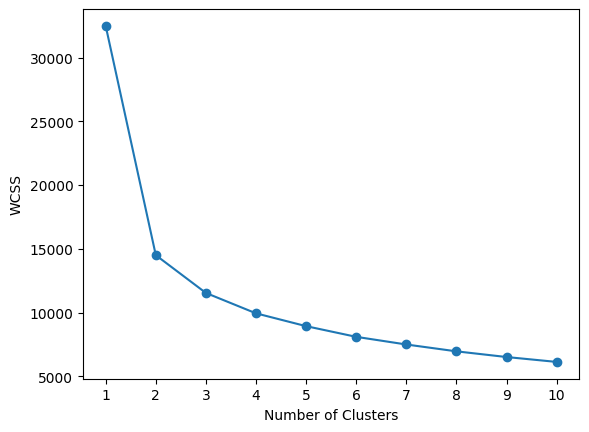

In [25]:
# Plot Elbow Curve

plt.plot(range(1,11),wcss,marker='o')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Determining the cluster

from kneed import KneeLocator

kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [27]:
# Performance metrics

from sklearn.metrics import silhouette_score

silhouette_coeff = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_tnf)
    score = silhouette_score(X_train_tnf,kmeans.labels_)
    silhouette_coeff.append(score) 

In [28]:
silhouette_coeff

[0.548519868553958,
 0.3021759135249607,
 0.2783683846204039,
 0.2309991789575322,
 0.23241467330455376,
 0.23752039361687372,
 0.23861560881380658,
 0.2276046217151117,
 0.2296925417647869]

In [29]:
kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(X_train_tnf)

KMeans(n_clusters=2)

In [30]:
kmeans_train_label = kmeans.labels_
kmeans_train_label

array([1, 1, 1, ..., 1, 1, 0])

In [31]:
kmeans_test_label = kmeans.predict(X_test_tnf)
kmeans_test_label

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [32]:
silhouette_score(X_test_tnf,kmeans_test_label)

0.5510699847471436

### Hierarchical Clustering

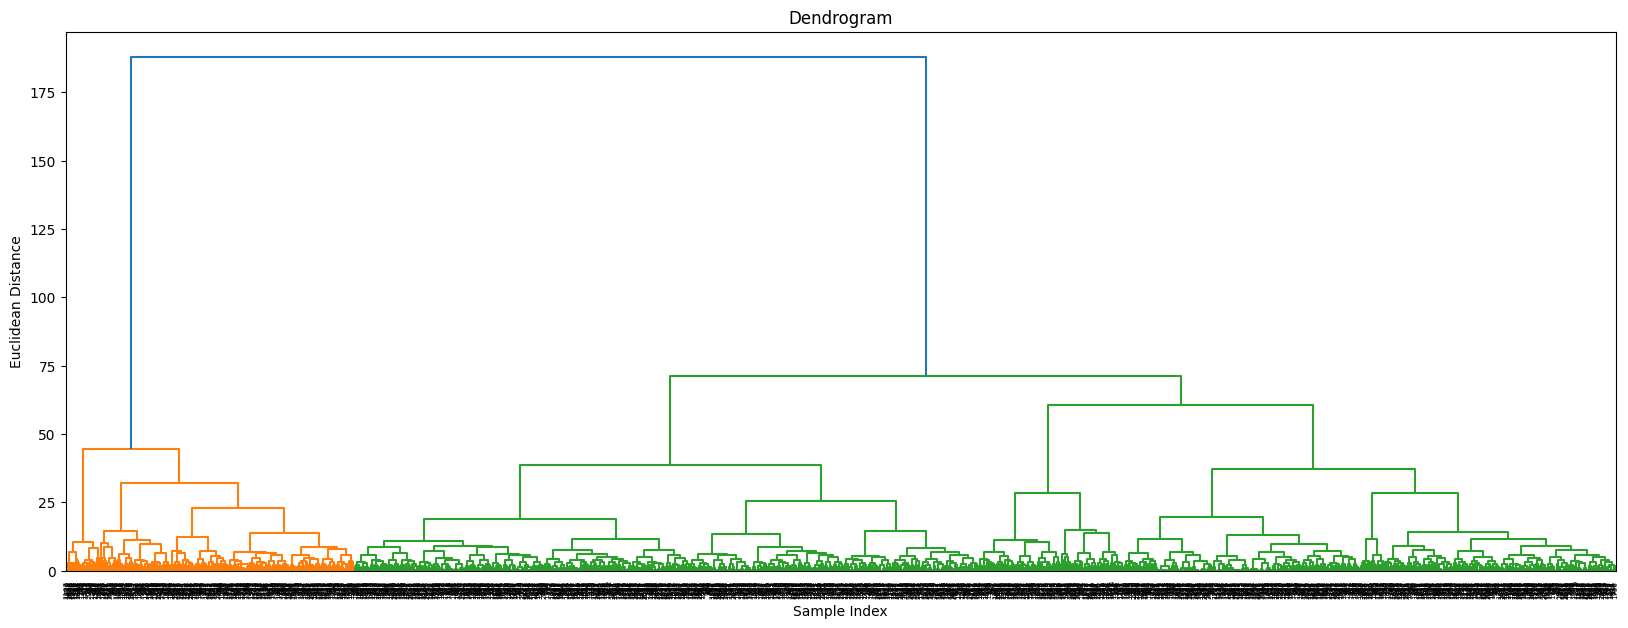

In [33]:
import scipy.cluster.hierarchy as sc

# Plot the Dendrogram
plt.figure(figsize=(20,7))
sc.dendrogram(sc.linkage(X_train_tnf,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

silhouette_coeff1 = []

for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo.fit(X_train_tnf)
    score = silhouette_score(X_train_tnf,agglo.labels_)
    silhouette_coeff1.append(score) 

In [35]:
silhouette_coeff1

[0.5520295845907556,
 0.25511267672215476,
 0.2504382504271469,
 0.2497441332339305,
 0.19344129408768426,
 0.20136469291119533,
 0.19015863082501572,
 0.1949688372900473,
 0.1992515041918334]

In [36]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X_train_tnf)

AgglomerativeClustering()

In [37]:
agglo_train_label = agglo.labels_
agglo_train_label

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [38]:
agglo_test_label = agglo.fit_predict(X_test_tnf)
agglo_test_label

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [39]:
silhouette_score(X_test_tnf,agglo_test_label)

0.5549516577664934